In [67]:
from examples.seismic import Receiver, Model, plot_velocity, demo_model, setup_geometry, AcquisitionGeometry

from examples.seismic.acoustic import acoustic_setup, AcousticWaveSolver
from examples.seismic.vector_reflectivity import vector_reflectivity_setup, VectorReflectivityAcousticWaveSolver

import numpy as np

from devito import norm, configuration, VectorTimeFunction, TimeFunction

import matplotlib.pyplot as plt

configuration['ignore-unknowns'] = 1

In [68]:
model = demo_model(preset='layers-isotropic', space_order=2, time_order=1, shape=(20, 25), spacing=(15., 15.), nbl=10, nlayers=3, dtype=np.float64)

Operator `initdamp` ran in 0.01 s


In [69]:
rec_coordinates = np.empty((1, 2))
rec_coordinates[:, 0] = model.domain_size[0]/2
rec_coordinates[:, 1] = model.domain_size[1]/2

src_coordinates = np.empty((1, 2))
src_coordinates[0, 0] = model.domain_size[0]/2
src_coordinates[0, 1] = model.origin[-1] + model.spacing[-1]

geometry = AcquisitionGeometry(model, rec_coordinates, src_coordinates, t0=0.0, tn=500., src_type='Ricker', f0=0.010)

In [70]:
solver_acoustic = AcousticWaveSolver(model, geometry, space_order=model.space_order)
solver_vector_reflectivity = VectorReflectivityAcousticWaveSolver(model, geometry, space_order=model.space_order)

In [71]:
rec_acoustic, u_acoustic, _ = solver_acoustic.forward(save=True)
rec_vector_reflectivity, u_vector_reflectivity, _ = solver_vector_reflectivity.forward(save=True)

Operator `Forward` ran in 0.01 s
Operator `Forward` ran in 0.01 s


In [72]:
nbl = model.nbl
u_acoustic.data[:, nbl:-nbl, nbl:-nbl].tofile('acoustic-forward.bin')
u_vector_reflectivity.data[:, nbl:-nbl, nbl:-nbl].tofile('vr-forward.bin')
u_acoustic.data[:, nbl:-nbl, nbl:-nbl].shape

(192, 20, 25)

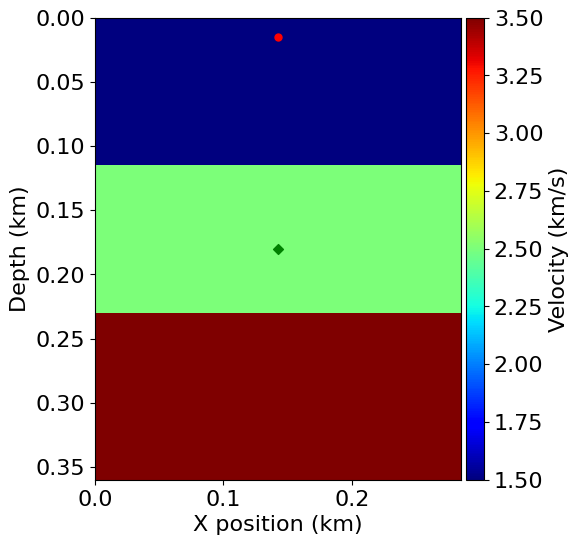

In [73]:
plot_velocity(solver_acoustic.model, solver_acoustic.geometry.src_positions, solver_acoustic.geometry.rec_positions)

In [74]:
_, v_acoustic, _ = solver_acoustic.adjoint(rec_acoustic, save=True)
_, v_vector_reflectivity, _ = solver_vector_reflectivity.adjoint(rec_acoustic, save=True)

No source type defined, returning uninitiallized (zero) source
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s
No source type defined, returning uninitiallized (zero) source
No source type defined, returning uninitiallized (zero) source
Operator `Adjoint` ran in 0.01 s


In [75]:
np.flip(v_acoustic.data[:, nbl:-nbl, nbl:-nbl], axis=0).tofile('acoustic-adjoint.bin')
np.flip(v_vector_reflectivity.data[:, nbl:-nbl, nbl:-nbl], axis=0).tofile('vr-adjoint.bin')

In [76]:
norm(rec_acoustic)**2, norm(rec_vector_reflectivity)**2

(np.float64(7955.520807432173), np.float64(24260.231916517925))